In [2]:
import tkinter as tk
from PIL import ImageTk,Image,ImageDraw
import numpy as np
import cv2
import os
import joblib
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
model = joblib.load('E-C-R-M.sav')

In [4]:
character_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

In [5]:
from matplotlib import pyplot as plt


In [6]:
scaler = joblib.load('scaler.pkl')

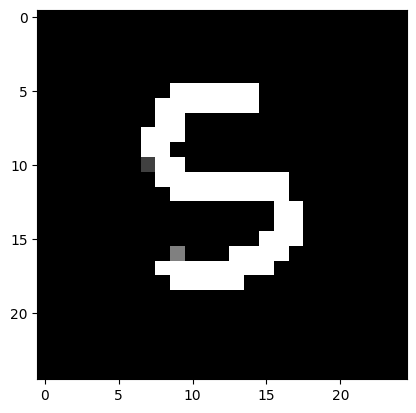

In [8]:

width=500
hight=500
font_fam = 'Helvetica 20 bold'
count=0

window = tk.Tk()

def event_func(event):
    x=event.x
    y=event.y

    x1=x-20
    x2=x+20

    y1=y-20
    y2=y+20

    canvas.create_oval((x1,y1,x2,y2),fill='white')
    img_draw.ellipse((x1,y1,x2,y2),fill='white')

def save():
    global count
    img_array=np.array(img)
    path=os.path.join('data',str(count)+'.jpg')
    cv2.imwrite(path,img_array)
    count+=1

def clear():
    global img,img_draw
    canvas.delete('all')
    img=Image.new('RGB',(width,hight),(0,0,0))
    img_draw=ImageDraw.Draw(img)
    label_status.config(text='PREDICTED CHARACTER: NONE')

canvas = tk.Canvas(window,width=width,height=hight,background='black')
canvas.grid(row=0,column=0,columnspan=4)

canvas.bind('<B1-Motion>',event_func)
img = Image.new('RGB',(width,hight),(0,0,0))
img_draw = ImageDraw.Draw(img)

def predict():
    img_array = np.array(img)
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    #img_array=255-img_array
    img_array = cv2.resize(img_array, (25, 25))
    plt.imshow(img_array, cmap="gray")
    img_array = np.reshape(img_array, (1, 625))

    img_array = scaler.transform(img_array)  # Apply the same scaling

    result = model.predict(img_array)[0]
    label = character_dict[result]

    label_status.config(text='PREDICTED CHARACTER: ' + label)
   





button_save = tk.Button(window,text='SAVE',background='green',foreground='white',font=font_fam, command=save)
button_save.grid(row=1,column=0)

button_predict = tk.Button(window,text='PREDICT',background='green',foreground='white',font=font_fam,command=predict)
button_predict.grid(row=1,column=1)

button_clear = tk.Button(window,text='CLEAR',background='green',foreground='white',font=font_fam,command=clear)
button_clear.grid(row=1,column=2)

button_exit = tk.Button(window,text='EXIT',background='red',foreground='white',font=font_fam,command=window.destroy)
button_exit.grid(row=1,column=3)

label_status = tk.Label(window,text='Predicted Character: NONE',background='white',font=font_fam)
label_status.grid(row=2,column=0,columnspan=4)



window.mainloop()